In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\dapangxing\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Q1 (15 points) 

#### This question is to be solved by hand.

Given the following learned Bayesian network structure explaining the relationships between variables in container shipping data:

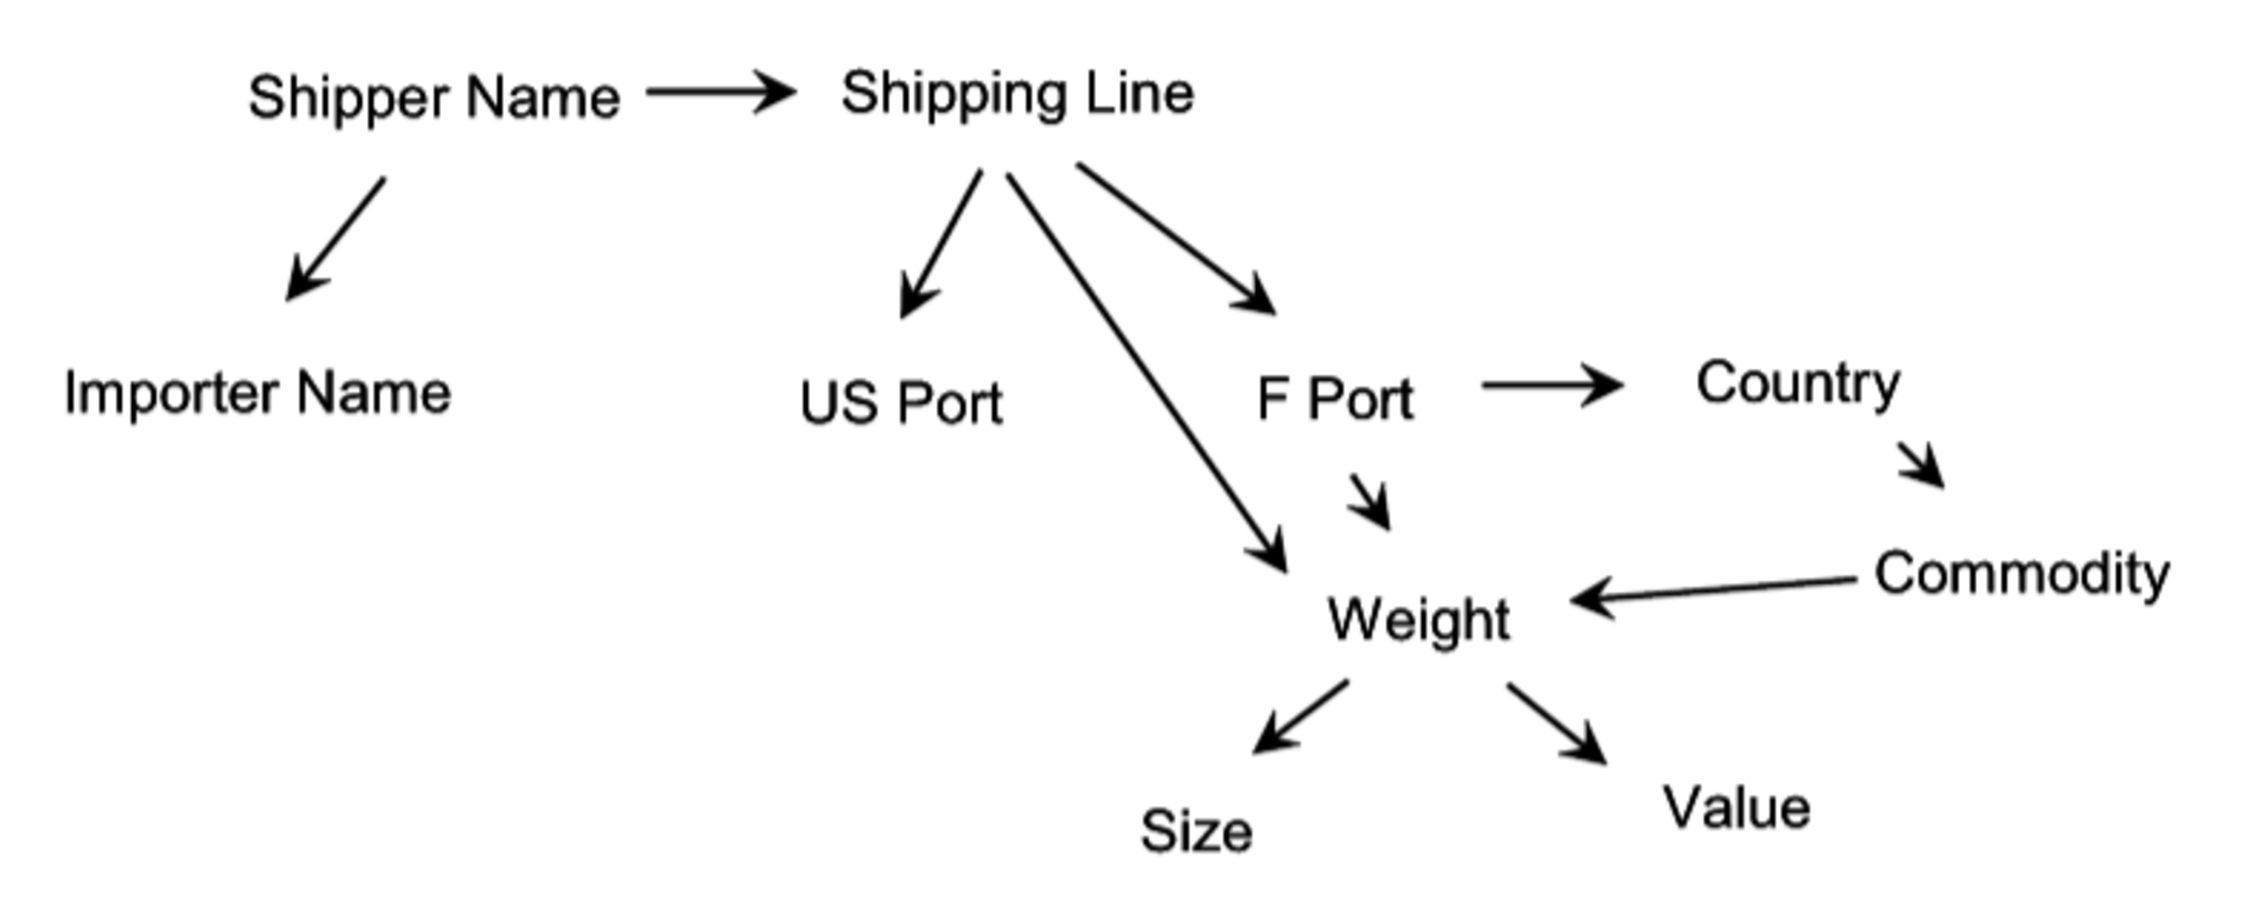

In [2]:
Image('HW3Q1.png')

1) Which of the following conditional independence relationships hold? Choose “Independent” or “Dependent” for each (6 points):

CI (Shipper Name, Value | F Port)?  Dependent

CI (Shipper Name, Value | Shipping Line)?  Independent 

CI (Foreign Port, Commodity | Country)?  Independent   

CI (Foreign Port, Commodity | County, Weight)?  Dependent

2) Now consider a smaller dataset with only four discrete attributes (Shipping Line, US Port, Foreign Port, Weight), and the following conditional probability distributions:

Shipping Line: CSCO (70%), ASCO (30%)

Foreign Port | Shipping Line = CSCO: Yokohama (40%), Vancouver (60%)

Foreign Port | Shipping Line = ASCO: Vancouver (100%)

US Port | Shipping Line = ASCO: Seattle (100%)

US Port | Shipping Line = CSCO: Seattle (80%), Los Angeles (20%)

Weight | Shipping Line = ASCO, Foreign Port = Vancouver: Light (30%), Medium (50%), Heavy (20%)

Weight | Shipping Line = CSCO, Foreign Port = Vancouver: Light (15%), Medium (70%), Heavy (15%)

Weight | Shipping Line = CSCO, Foreign Port = Yokohama: Light (10%), Medium (30%), Heavy (60%)

Which of the following packages is most anomalous?

a) A heavy package shipped from Vancouver to Seattle by ASCO

b) A heavy package shipped from Vancouver to Seattle by CSCO

c) A heavy package shipped from Yokohama to Los Angeles by CSCO

To answer this question, compute the likelihood of each package given the Bayesian Network (lowest likelihood = most anomalous). You must show your calculations to receive credit. (9 points)

a) Pr(ASCO)\* Pr(Vancouver|ASCO)\*Pr(Seattle|ASCO)\*Pr(heavy|ASCO,Vancouver) = 30%\*100%\*100%\*20% = 6%

b) Pr(CSCO)\* Pr(Vancouver|CSCO)\*Pr(Seattle|CSCO)\*Pr(heavy|CSCO,Vancouver) = 70%\*60%\*80%\*15% = 5.04%

c) Pr(CSCO)\* Pr(Yokohama|CSCO)\*Pr(Los Angeles|CSCO)\*Pr(heavy|CSCO,Yokohama) = 70%\*40%\*20%\*60% = 3.36%

package c) is is most anomalous.

### Q2. Bayesian Network Learning (35 points)

In this question, we use dataset: "HW3Q2.csv" for Bayesian Network Learning.

In [3]:
from sklearn.model_selection import train_test_split
data2=pd.read_csv("HW3Q2.csv")
train,test=train_test_split(data2,random_state=234,test_size=0.4)
data2.head()

,A,B,C,D,E,F
0,1,0,0,0,1,1
1,2,0,0,1,0,1
2,3,1,0,1,1,1
3,2,0,0,1,1,1
4,1,0,1,0,1,1


a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10 points)

b) Use the Bayesian Estimator to estimate the CPDs for your model and visualize the network with CPDs. (15 points)

c) Use the model to predict "A" for the testing dataset. Report the out-of-sample prediction accuracy. (10 points)   

### a)

In [4]:
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch
hc = HillClimbSearch(train, scoring_method=BicScore(train))
best_model = hc.estimate()
print(best_model.edges())

[('B', 'A'), ('D', 'A'), ('F', 'A')]


### b)

In [5]:
from pgmpy.estimators import BayesianEstimator
best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)
print best_model.local_independencies(best_model.nodes())

CPD of A:
+------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
| B    | B(0)             | B(0)             | B(0)             | B(0)             | B(1)             | B(1)             | B(1)             | B(1)             |
+------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
| D    | D(0)             | D(0)             | D(1)             | D(1)             | D(0)             | D(0)             | D(1)             | D(1)             |
+------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
| F    | F(0)             | F(1)             | F(0)             | F(1)             | F(0)             | F(1)             | F(0)             | F(1)             |
+------+----------------

### c)

In [6]:
predicted_train = best_model.predict(train.loc[:,"B":"F"])
print "In sample:",(train.loc[:,'A']==predicted_train['A']).mean()
predicted_test = best_model.predict(test.loc[:,"B":"F"])
print "Out of sample:",(test.loc[:,'A']==predicted_test['A']).mean()

In sample: 0.517166666667
Out of sample: 0.50475


### Q3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (50 points)

In this question you will use k-means and Gaussian mixture clustering in sklearn and hierarchical clustering in scipy to answer the question, “Do different types of crime display different trends over space and time?”  The dataset “HW3Q3_1.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

- The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

- The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

- The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

- Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

- Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

- Category = “P2” corresponds to Part 2 (less serious) crimes.

To answer parts a through f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day (hour_0..hour_23) attributes.

a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5 pts)

b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).

c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts)  

d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (5 pts)

e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5 pts)

f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)

g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes (day_Sun..day_Sat).  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)


In [7]:
data3=pd.read_csv("HW3Q3_1.csv")
data3.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,...,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,...,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,...,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0.034000,...,0.028000,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0.009804,...,0.029412,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000


In [8]:
data4=pd.read_csv("HW3Q3_2.csv")
data4.head()

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
0,1,Rogers Park,1164399.219,1947666.815,7.7,23.6,8.7,18.2,27.5,23939,11.870556,3420
1,2,West Ridge,1158307.200,1943243.722,7.8,17.2,8.8,20.8,38.5,23040,9.870385,3068
2,3,Uptown,1168228.082,1930980.022,3.8,24.0,8.9,11.8,22.2,35787,8.672137,3330
3,4,Lincoln Square,1159618.804,1933105.743,3.4,10.9,8.2,13.4,25.5,37524,8.600422,1859
4,5,North Center,1161104.228,1924056.010,0.3,7.5,5.2,4.5,26.2,57123,10.100636,1280


### a)

In [9]:
X = data3.loc[:,"hour_0":"hour_23"]

In [10]:
from sklearn.cluster import KMeans
km = KMeans(random_state=234,n_clusters=3)
res_km = km.fit(X)

print 'Cluster assignments:',res_km.labels_
print '\nCluster centers:\n',res_km.cluster_centers_
print '\nSum of squared errors:',res_km.inertia_

Cluster assignments: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 2 1 1 1 1 1 1 0 0 2 0 2 0 0 0 0 0 1 2 2 2 2 0 2 2 0 2 2 2 2 2 2 1 0 0
 1 1 0 2 2 1 1 2 1 1 0 0 2 1 2 1 0 0 2 1 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 2 0 0]

Cluster centers:
[[ 0.05364158  0.04182416  0.03691183  0.03104211  0.02510576  0.01886402
   0.01946212  0.02434162  0.02766839  0.0335171   0.03680552  0.03720506
   0.04254665  0.03994431  0.04208987  0.0473956   0.05170137  0.05425891
   0.05757893  0.05599685  0.0575726   0.05411778  0.05837336  0.0520345 ]
 [ 0.0424857   0.0124839   0.01063242  0.00917263  0.00935287  0.00782255
   0.01345328  0.02374573  0.05099082  0.09235549  0.07911561  0.06020408
   0.08877015  0.06328364  0.06309555  0.06824587  0.06216217  0.05215833
   0.04915732  0.04164785  0.03414496  0.02476704  0.02192139  0.01883064]
 [ 0.02578926  0.01492578  0.01124032  0.00610476  0.00276913  0.00135912
   0.00394105  0.00860188  0.01212724  0.02407099 

In [11]:
data3['km'] = res_km.labels_

In [12]:
km_1 = np.zeros((3,24), dtype=float)
for i in range(0,3):
    km_1[i] = np.mean(data3[(data3['km'] == i)])["hour_0":"hour_23"].values

In [13]:
km_1

array([[ 0.05364158,  0.04182416,  0.03691183,  0.03104211,  0.02510576,
         0.01886402,  0.01946212,  0.02434162,  0.02766839,  0.0335171 ,
         0.03680552,  0.03720506,  0.04254665,  0.03994431,  0.04208987,
         0.0473956 ,  0.05170137,  0.05425891,  0.05757893,  0.05599685,
         0.0575726 ,  0.05411778,  0.05837336,  0.0520345 ],
       [ 0.0424857 ,  0.0124839 ,  0.01063242,  0.00917263,  0.00935287,
         0.00782255,  0.01345328,  0.02374573,  0.05099082,  0.09235549,
         0.07911561,  0.06020408,  0.08877015,  0.06328364,  0.06309555,
         0.06824587,  0.06216217,  0.05215833,  0.04915732,  0.04164785,
         0.03414496,  0.02476704,  0.02192139,  0.01883064],
       [ 0.02578926,  0.01492578,  0.01124032,  0.00610476,  0.00276913,
         0.00135912,  0.00394105,  0.00860188,  0.01212724,  0.02407099,
         0.05418393,  0.07890851,  0.0586388 ,  0.05664272,  0.05754662,
         0.04407949,  0.03910712,  0.04398485,  0.07308993,  0.10678483,
  

In [14]:
df1 = pd.DataFrame(km_1)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.053642,0.041824,0.036912,0.031042,0.025106,0.018864,0.019462,0.024342,0.027668,0.033517,...,0.042090,0.047396,0.051701,0.054259,0.057579,0.055997,0.057573,0.054118,0.058373,0.052035
1,0.042486,0.012484,0.010632,0.009173,0.009353,0.007823,0.013453,0.023746,0.050991,0.092355,...,0.063096,0.068246,0.062162,0.052158,0.049157,0.041648,0.034145,0.024767,0.021921,0.018831
2,0.025789,0.014926,0.011240,0.006105,0.002769,0.001359,0.003941,0.008602,0.012127,0.024071,...,0.057547,0.044079,0.039107,0.043985,0.073090,0.106785,0.091043,0.080099,0.065787,0.039175


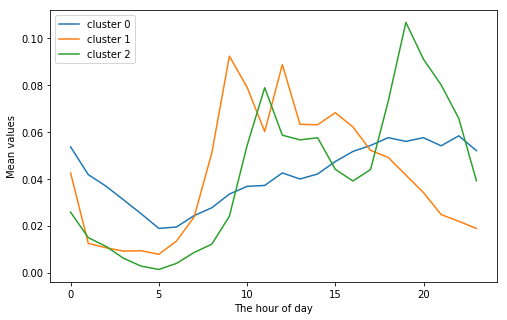

In [15]:
fig = plt.figure(figsize = (8,5))
for i in range(3):
    plt.plot(df1.iloc[i,:], label = 'cluster '+ str(i))
plt.xlabel("The hour of day")
plt.ylabel("Mean values")
plt.legend()
plt.show()

### b)

The proportion of crimes in cluster 0 do not change very much during the day with a drop around 5 am in the morning. The proportion of crimes in cluster 1 is low at night and increase from early morning and have a peak from 9 am to 12 pm, then drop again in the afternoon. The proportion of crimes in cluster 2 is low at night and increase since 9 am with a peak around 11 am and then drop again. Continue with an increase since 17 pm and have a peak around 19 pm then drop again.

### c)

In [16]:
data3['crime_type1'] = data3['crime_type'].apply(lambda x: x.split(':')[0])

In [17]:
data3[data3['crime_type1']=='DECEPTIVE PRACTICE'].crime_type

36    DECEPTIVE PRACTICE: ATTEMPT - FINANCIAL IDENTI...
37                      DECEPTIVE PRACTICE: BOGUS CHECK
38                DECEPTIVE PRACTICE: COUNTERFEIT CHECK
39          DECEPTIVE PRACTICE: COUNTERFEITING DOCUMENT
40                DECEPTIVE PRACTICE: CREDIT CARD FRAUD
41    DECEPTIVE PRACTICE: FINANCIAL IDENTITY THEFT $...
42    DECEPTIVE PRACTICE: FINANCIAL IDENTITY THEFT O...
43                          DECEPTIVE PRACTICE: FORGERY
44         DECEPTIVE PRACTICE: FRAUD OR CONFIDENCE GAME
45            DECEPTIVE PRACTICE: ILLEGAL USE CASH CARD
46          DECEPTIVE PRACTICE: THEFT OF LABOR/SERVICES
47       DECEPTIVE PRACTICE: THEFT OF LOST/MISLAID PROP
Name: crime_type, dtype: object

In [18]:
data3.groupby(['km','crime_type1']).size()

km  crime_type1                     
0   ARSON                                1
    ASSAULT                              6
    BATTERY                             12
    BURGLARY                             3
    CRIM SEXUAL ASSAULT                  2
    CRIMINAL DAMAGE                      5
    CRIMINAL TRESPASS                    4
    DECEPTIVE PRACTICE                   2
    HOMICIDE                             1
    INTERFERENCE WITH PUBLIC OFFICER     1
    LIQUOR LAW VIOLATION                 1
    MOTOR VEHICLE THEFT                  3
    NARCOTICS                            2
    OFFENSE INVOLVING CHILDREN           2
    OTHER OFFENSE                        5
    ROBBERY                              9
    SEX OFFENSE                          2
    STALKING                             1
    THEFT                                4
    WEAPONS VIOLATION                    3
1   ASSAULT                              1
    BATTERY                              1
    BURGLARY     

We can see that for cluster 0 includes many crime types do not change much during 24 hours with a slight increase at night, for example, ROBBERY, CRIMINAL DAMAGE and CRIMINAL TRESPASS. Cluster 1 includes crime types that happen mostly in the morning, such as DECEPTIVE PRACTICE, which include CREDIT CARD FRAUD and COUNTERFEITING DOCUMENT. Cluster 2 includes crime types that happen more often at night such as NARCOTICS. The results show that the clusters did reveal the patterns of different crime types.

### d)

In [19]:
km_2 = np.zeros((3,7), dtype=float)
for i in range(0,3):
    km_2[i] = np.mean(data3[(data3['km'] == i)])["day_Sun":"day_Sat"].values

In [20]:
df2 = pd.DataFrame(km_2)
df2.head()

,0,1,2,3,4,5,6
0,0.146923,0.140521,0.138356,0.135286,0.137113,0.149810,0.151992
1,0.108502,0.150429,0.152455,0.153047,0.153902,0.158629,0.123036
2,0.115915,0.140945,0.160049,0.148696,0.145199,0.156605,0.132593


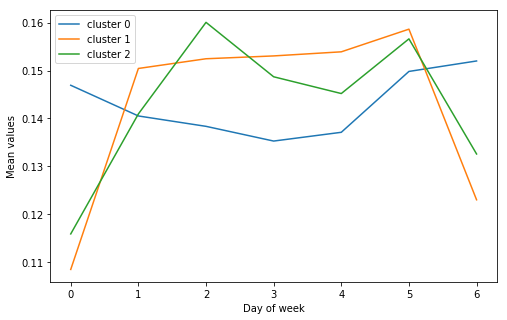

In [21]:
fig = plt.figure(figsize = (8,5))
for i in range(3):
    plt.plot(df2.iloc[i,:], label = 'cluster '+ str(i))
plt.xlabel("Day of week")
plt.ylabel("Mean values")
plt.legend()
plt.show()

Cluster 0 happen more often during weekends. Cluster 1 has a low proportion during weekends while high during weekdays. Cluster 2 has a low proportion during weekends and have two peaks on Tuesday and Friday and a small drop between these two days.

### e)

In [22]:
km_3 = np.zeros((3,77), dtype=float)
for i in range(0,3):
    km_3[i] = np.mean(data3[(data3['km'] == i)])["community_area_1":"community_area_77"].values

In [23]:
df3 = pd.DataFrame(km_3)
df3.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.014190,0.012614,0.013718,0.007307,0.004148,0.021163,0.010299,0.027837,0.000690,0.003514,...,0.026130,0.028922,0.009371,0.028839,0.002854,0.011386,0.001584,0.007115,0.010147,0.007367
1,0.014446,0.014380,0.016437,0.010941,0.007502,0.024766,0.018054,0.053912,0.002169,0.007858,...,0.017873,0.020703,0.010150,0.023909,0.005234,0.011028,0.004348,0.009446,0.009696,0.012677
2,0.007818,0.005919,0.007367,0.002166,0.001113,0.006101,0.001626,0.013915,0.000376,0.001264,...,0.038343,0.027435,0.002366,0.033006,0.000951,0.010082,0.000555,0.007153,0.000911,0.001522


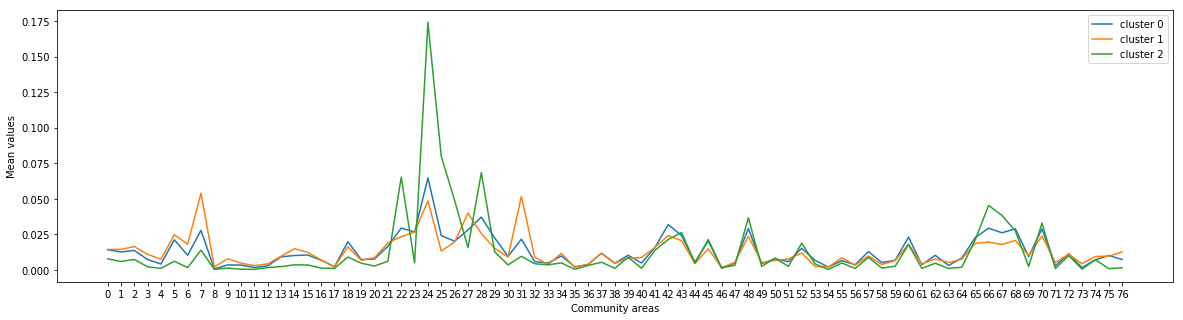

In [24]:
fig = plt.figure(figsize = (20,5))
for i in range(3):
    plt.plot(df3.iloc[i,:], label = 'cluster '+ str(i))
plt.xlabel("Community areas")
plt.ylabel("Mean values")
plt.xticks(range(77))
plt.legend()
plt.show()

I found that for cluster 2, the proportion is very high for community areas 23, 25, 26, 29. I chose to examine poverty, overcrowding, and number of crimes for different comunity areas.

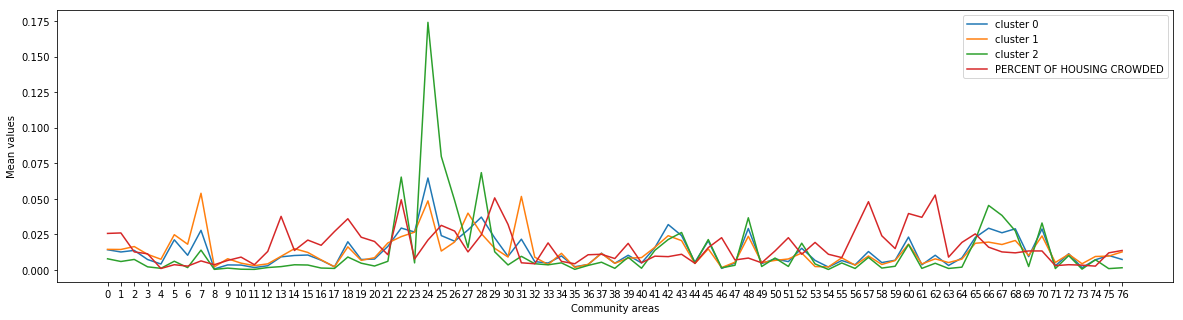

In [25]:
fig = plt.figure(figsize = (20,5))
for i in range(3):
    plt.plot(df3.iloc[i,:], label = 'cluster '+ str(i))
plt.plot(data4['PERCENT OF HOUSING CROWDED']/300)
plt.xlabel("Community areas")
plt.ylabel("Mean values")
plt.xticks(range(77))
plt.legend()
plt.show()

There is a positive correlation of overcrowding and crime proportions,for example Community 23 and 26 have high overcrowding rate. But the trend is not very obvious.

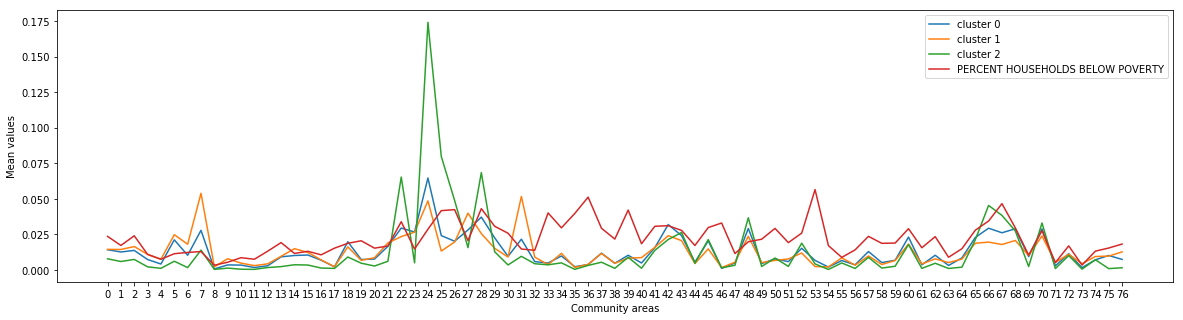

In [26]:
fig = plt.figure(figsize = (20,5))
for i in range(3):
    plt.plot(df3.iloc[i,:], label = 'cluster '+ str(i))
plt.plot(data4['PERCENT HOUSEHOLDS BELOW POVERTY']/1000)
plt.xlabel("Community areas")
plt.ylabel("Mean values")
plt.xticks(range(77))
plt.legend()
plt.show()

There is a positive correlation of poverty and crime proportions.Community 23, 26 and 29 all have high poverty rate.

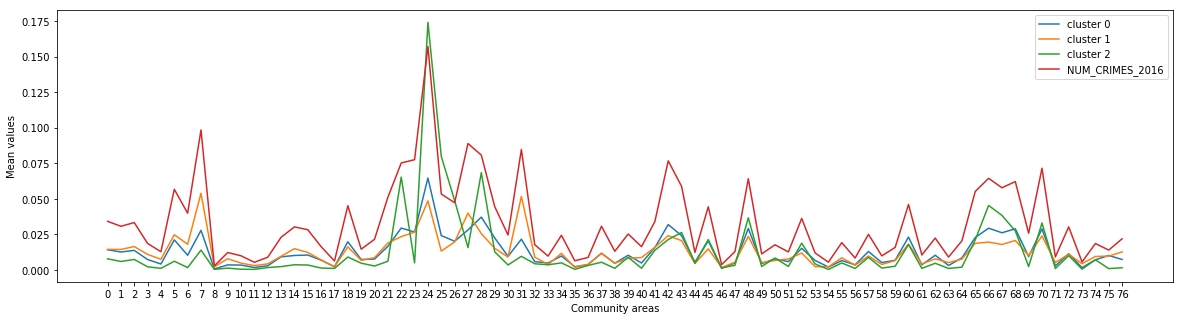

In [27]:
fig = plt.figure(figsize = (20,5))
for i in range(3):
    plt.plot(df3.iloc[i,:], label = 'cluster '+ str(i))
plt.plot(data4['NUM_CRIMES_2016']/100000)
plt.xlabel("Community areas")
plt.ylabel("Mean values")
plt.xticks(range(77))
plt.legend()
plt.show()

The positive correlation with crime rate is very obvious. Community 23, 25, 26 and 29 all have high crime rate.

### f)

In [28]:
data3.groupby(['km','Category']).size()

km  Category
0   P1P         11
    P1V         24
    P2          34
1   P1P          4
    P2          23
2   P2          23
dtype: int64

There is no clear patterns of the FBI’s division and three clusters. less serious crimes are grouped into all three clusters with a little more in cluster 0. Violent Crimes are all grouped into cluster 0. Most of Property Crimes are also grouped into cluster 0.

### g)

In [29]:
X = data3.loc[:,"day_Sun":"day_Sat"]

In [30]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.234967039802
For n_clusters = 3, the average silhouette_score is : 0.232859305226
For n_clusters = 4, the average silhouette_score is : 0.210690671645
For n_clusters = 5, the average silhouette_score is : 0.153223514174
For n_clusters = 6, the average silhouette_score is : 0.170242880032
For n_clusters = 7, the average silhouette_score is : 0.173353484564
For n_clusters = 8, the average silhouette_score is : 0.184212008422
For n_clusters = 9, the average silhouette_score is : 0.137644013416


Choose 2 clusters with highest silhouette_score.

In [31]:
km = KMeans(random_state=324,n_clusters=2)
res_km = km.fit(X)
print 'Cluster assignments:',res_km.labels_

Cluster assignments: [0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1
 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0
 1 0 1 1 0 0 0 1]


In [32]:
data3['km'] = res_km.labels_
data3.groupby('km').size()

km
0    56
1    63
dtype: int64

In [33]:
from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
cluster_labels = list()
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters,random_state=324)
    res_gmm = gmm.fit(X)
    cluster_labels = res_gmm.predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.25672726757
For n_clusters = 3, the average silhouette_score is : 0.201189632018
For n_clusters = 4, the average silhouette_score is : 0.19150195368
For n_clusters = 5, the average silhouette_score is : 0.195041449211
For n_clusters = 6, the average silhouette_score is : 0.0764222953891
For n_clusters = 7, the average silhouette_score is : 0.0738759916166
For n_clusters = 8, the average silhouette_score is : 0.104692832377
For n_clusters = 9, the average silhouette_score is : 0.0840451044547


Choose 2 clusters with highest silhouette_score.

In [34]:
gmm = GaussianMixture(n_components=2,random_state=324)
res_gmm = gmm.fit(X)
res_gmm.predict(X)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [35]:
data3['gmm'] = res_gmm.predict(X)
data3.groupby('gmm').size()

gmm
0    89
1    30
dtype: int64

In [36]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage 
range_n_clusters = range(2,10)
Z = linkage(X, 'single')

for n_clusters in range_n_clusters:
    cluster_labels=fcluster(Z, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.637764808067
For n_clusters = 3, the average silhouette_score is : 0.556847738297
For n_clusters = 4, the average silhouette_score is : 0.40557775076
For n_clusters = 5, the average silhouette_score is : 0.387703818875
For n_clusters = 6, the average silhouette_score is : 0.390076195102
For n_clusters = 7, the average silhouette_score is : 0.346218448204
For n_clusters = 8, the average silhouette_score is : 0.328998157644
For n_clusters = 9, the average silhouette_score is : 0.325421927489


Choose 2 clusters with highest silhouette_score.

In [37]:
fcluster(Z, 2, criterion='maxclust')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [38]:
data3['single'] = fcluster(Z, 2, criterion='maxclust')
data3.groupby('single').size()

single
1    118
2      1
dtype: int64

In [39]:
# Choose a range of cluster numbers that you would like to evalulate:
range_n_clusters = range(2,10)
Z = linkage(X, 'complete')

for n_clusters in range_n_clusters:
    cluster_labels=fcluster(Z, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.610064611355
For n_clusters = 3, the average silhouette_score is : 0.172687181466
For n_clusters = 4, the average silhouette_score is : 0.192151693748
For n_clusters = 5, the average silhouette_score is : 0.150252078225
For n_clusters = 6, the average silhouette_score is : 0.152296815722
For n_clusters = 7, the average silhouette_score is : 0.149262676161
For n_clusters = 8, the average silhouette_score is : 0.101304401234
For n_clusters = 9, the average silhouette_score is : 0.100665038992


Choose 2 clusters with highest silhouette_score.

In [40]:
fcluster(Z, 2, criterion='maxclust')

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [41]:
data3['complete'] = fcluster(Z, 2, criterion='maxclust')
data3.groupby('complete').size()

complete
1      2
2    117
dtype: int64

In [42]:
km_4 = np.zeros((8,7), dtype=float)
for i in range(0,2):
    km_4[i] = np.mean(data3[(data3['km'] == i)])["day_Sun":"day_Sat"].values
for i in range(0,2):
    km_4[i+2] = np.mean(data3[(data3['gmm'] == i)])["day_Sun":"day_Sat"].values
for i in range(0,2):
    km_4[i+4] = np.mean(data3[(data3['single'] == i+1)])["day_Sun":"day_Sat"].values
for i in range(0,2):
    km_4[i+6] = np.mean(data3[(data3['complete'] == i+1)])["day_Sun":"day_Sat"].values

In [43]:
df4 = pd.DataFrame(km_4)
df4

,0,1,2,3,4,5,6
0,0.158050,0.133274,0.132006,0.129498,0.130075,0.150693,0.166403
1,0.109245,0.151364,0.157962,0.152938,0.153516,0.155286,0.119690
2,0.142353,0.142957,0.139089,0.138725,0.139056,0.149072,0.148746
3,0.102127,0.142535,0.165500,0.151347,0.152656,0.165147,0.120687
4,0.132216,0.143667,0.146391,0.142584,0.142707,0.152386,0.140048
5,0.131783,0.046512,0.069767,0.062016,0.116279,0.240310,0.333333
6,0.157748,0.063976,0.077497,0.073621,0.096965,0.268829,0.261364
7,0.131776,0.144199,0.146914,0.143075,0.143263,0.151147,0.139627


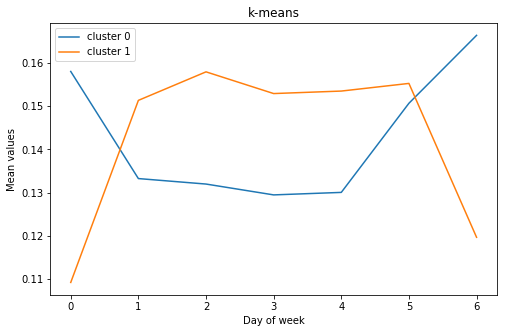

In [44]:
fig = plt.figure(figsize = (8,5))
for i in range(2):
    plt.plot(df4.iloc[i,:], label = 'cluster '+ str(i))
plt.xlabel("Day of week")
plt.ylabel("Mean values")
plt.title("k-means")
plt.legend()
plt.show()

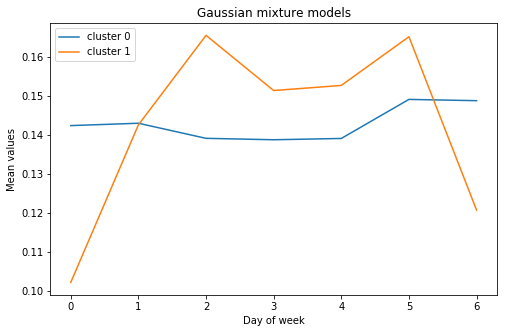

In [45]:
fig = plt.figure(figsize = (8,5))
for i in range(2,4):
    plt.plot(df4.iloc[i,:], label = 'cluster '+ str(i-2))
plt.xlabel("Day of week")
plt.ylabel("Mean values")
plt.title("Gaussian mixture models")
plt.legend()
plt.show()

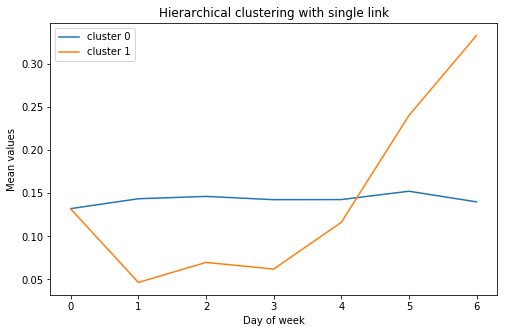

In [46]:
fig = plt.figure(figsize = (8,5))
for i in range(4,6):
    plt.plot(df4.iloc[i,:], label = 'cluster '+ str(i-4))
plt.xlabel("Day of week")
plt.ylabel("Mean values")
plt.title("Hierarchical clustering with single link")
plt.legend()
plt.show()

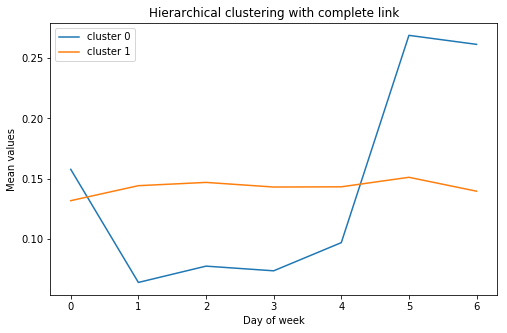

In [47]:
fig = plt.figure(figsize = (8,5))
for i in range(6,8):
    plt.plot(df4.iloc[i,:], label = 'cluster '+ str(i-6))
plt.xlabel("Day of week")
plt.ylabel("Mean values")
plt.title("Hierarchical clustering with complete link")
plt.legend()
plt.show()

k-means and Gaussian mixture models give similar results, with one cluster include crimes happen more often on weekends and another one happen more often on weekdays. Hierarchical clustering does not have very good results here. Both single link and complete link give results that have only one or two records in one cluster.